<a href="https://colab.research.google.com/github/Kingdarksoul/titanci-ml/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: install batch normaliztion

!pip install tensorflow-addons


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

In [5]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.layers import BatchNormalization

In [24]:
# generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [25]:
# normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [57]:
#create CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.add(Dropout(0.1))


In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 104ms/step - loss: 7.6469 - accuracy: 0.4985 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 63s 101ms/step - loss: 7.6059 - accuracy: 0.5018 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 7.6816 - accuracy: 0.4969 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 7.6273 - accuracy: 0.5003 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 7.6642 - accuracy: 0.4980 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 7.6680 - accuracy: 0.4978 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 7.6479 - accuracy: 0.4990 - val_loss: 7.6246 - val_ac

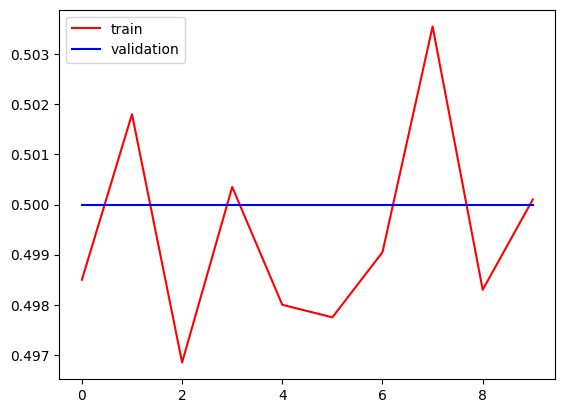

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

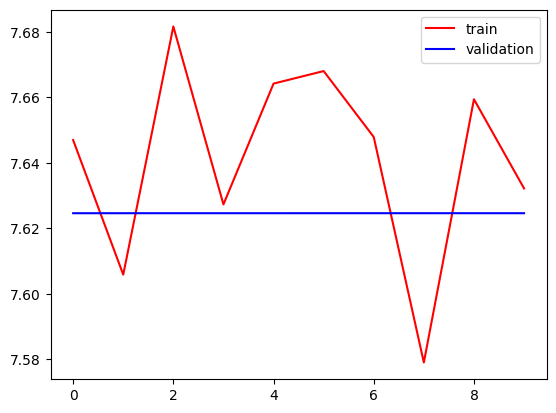

In [35]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# ways to reduce overfitting
add more data
data augmentation
L1/L2 regularizer
dropout
batch normalization
reduce complexity

In [49]:
import cv2

In [63]:
test_img=cv2.imread('/content/cat.jpg')

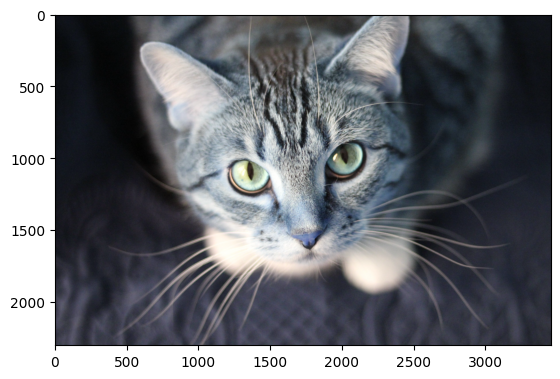

In [64]:
plt.imshow(test_img)

In [65]:
test_img.shape

(2304, 3456, 3)

In [66]:
test_img=cv2.resize(test_img,(256,256))

In [67]:
test_input=test_img.reshape((1,256,256,3))

In [68]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.00028317]], dtype=float32)